# PRACTICA 4 - Regresión Logistica y Analisis ROC
Iván Fernandez París

Javier Fraile Iglesias

# Apartado 1

In [1]:
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica

from Datos import Datos
import EstrategiaParticionado

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Datos
dataset_wdbc = Datos('./wdbc.csv')
dataset_prima = Datos('./pima-indians-diabetes.csv')

estrategia = EstrategiaParticionado.ValidacionSimple(numeroEjec=100, propTest=30)

lr_s = [0.1, 0.3, 0.5, 0.7, 1]
epocs = [5, 10, 20, 30, 50]


# Funcion para generar errores para cada valor de epocas y learning rates
def get_errors_RL(dataset):
    erroresRL = [[] for _ in range(len(epocs))]

    for i, epoc in enumerate(epocs):
        for lr in lr_s:
            clasificador_RL = ClasificadorRegresionLogistica(normalizar=True, learning_rate=lr, n_epocs=epoc)
            errorRL, _ = clasificador_RL.validacion(estrategia, dataset)
            print("epocs:", epoc, "lr:", lr, "errors:", errorRL)
            erroresRL[i].append(errorRL[0])

    return erroresRL


In [9]:
# Predictions wdbc
erroresRL = get_errors_RL(dataset_wdbc)

epocs: 5 lr: 0.1 errors: (0.034035087719298245, 0.01347264859567785)
epocs: 5 lr: 0.3 errors: (0.04187134502923977, 0.01967069269991312)
epocs: 5 lr: 0.5 errors: (0.04818713450292398, 0.023173247908407964)
epocs: 5 lr: 0.7 errors: (0.04836257309941519, 0.022931956481964083)
epocs: 5 lr: 1 errors: (0.050116959064327476, 0.025346070893460568)
epocs: 10 lr: 0.1 errors: (0.03368421052631579, 0.013592434784439533)
epocs: 10 lr: 0.3 errors: (0.043567251461988296, 0.020797265382553543)
epocs: 10 lr: 0.5 errors: (0.04713450292397661, 0.024614534569270877)
epocs: 10 lr: 0.7 errors: (0.048596491228070166, 0.025726940137841076)
epocs: 10 lr: 1 errors: (0.04771929824561403, 0.028859752809734525)
epocs: 20 lr: 0.1 errors: (0.03461988304093567, 0.014833065602327663)
epocs: 20 lr: 0.3 errors: (0.04304093567251461, 0.019753967012962788)
epocs: 20 lr: 0.5 errors: (0.046315789473684206, 0.023151986959829)
epocs: 20 lr: 0.7 errors: (0.047953216374269, 0.027103228599430332)
epocs: 20 lr: 1 errors: (0.0487

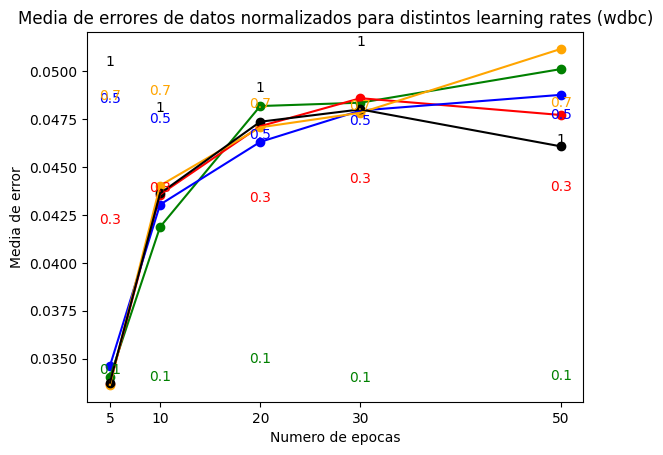

In [10]:
# Plot
col = ["green", "red", "blue", "orange", "black", "gray"]

for i in range(len(epocs)):
    plt.scatter(epocs, erroresRL[i], color=col[i])
    plt.plot(epocs, erroresRL[i], color=col[i])

    for j, lr in enumerate(lr_s):
        font = {
                'color':  col[j],
                'size': 10
                }
        plt.text(epocs[i], erroresRL[i][j], lr, va='bottom', ha='center', fontdict=font)

plt.xlabel("Numero de epocas")
plt.ylabel("Media de error")

plt.xticks(epocs)
plt.title("Media de errores de datos normalizados para distintos learning rates (wdbc)")

plt.show()

#### Nota sobre la grafica

Se ejecuta para cada numero de epocas con todos los learning rates, y se muestra como etiqueta en la figura el learning rate, lo que pasa es que no lo coloca bien. Pero se puede ver en orden de abajo a arriba. que learning rate tiene menos fallos para cada numero de epocas por la colocacion de la etiqueta de abajo a arriba

In [31]:
# Predictions prima_indian_diabetes
erroresRL = get_errors_RL(dataset_prima)

epocs: 5 lr: 0.1 errors: (0.24857142857142855, 0.027042801839179516)
epocs: 5 lr: 0.3 errors: (0.2736796536796537, 0.032416005288273056)
epocs: 5 lr: 0.5 errors: (0.2887878787878788, 0.036514298278188556)
epocs: 5 lr: 0.7 errors: (0.298008658008658, 0.04027937890888473)
epocs: 5 lr: 1 errors: (0.3035064935064935, 0.04352272962749458)
epocs: 10 lr: 0.1 errors: (0.24865800865800863, 0.027140613148332292)
epocs: 10 lr: 0.3 errors: (0.2736796536796537, 0.032416005288273056)
epocs: 10 lr: 0.5 errors: (0.2887878787878788, 0.036514298278188556)
epocs: 10 lr: 0.7 errors: (0.2978787878787879, 0.04017211056249373)
epocs: 10 lr: 1 errors: (0.30337662337662336, 0.04358634527664242)
epocs: 20 lr: 0.1 errors: (0.24865800865800863, 0.02748368899088996)
epocs: 20 lr: 0.3 errors: (0.2736796536796537, 0.032416005288273056)
epocs: 20 lr: 0.5 errors: (0.2887878787878788, 0.036514298278188556)
epocs: 20 lr: 0.7 errors: (0.29796536796536793, 0.04022041089728433)
epocs: 20 lr: 1 errors: (0.3032034632034632, 

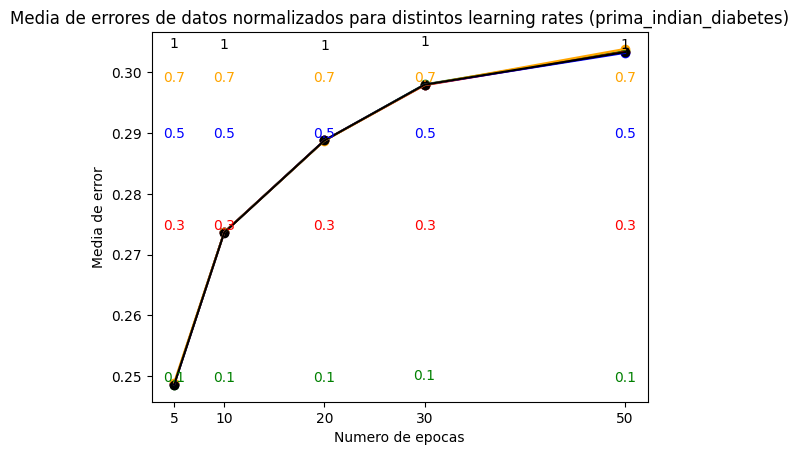

In [32]:
# Plot
col = ["green", "red", "blue", "orange", "black"]

for i in range(len(epocs)):
    plt.scatter(epocs, erroresRL[i], color=col[i])
    plt.plot(epocs, erroresRL[i], color=col[i])

    for j, lr in enumerate(lr_s):
        font = {
                'color':  col[j],
                'size': 10
                }
        plt.text(epocs[i], erroresRL[i][j], lr, va='bottom', ha='center', fontdict=font)

plt.xlabel("Numero de epocas")
plt.ylabel("Media de error")

plt.xticks(epocs)
plt.title("Media de errores de datos normalizados para distintos learning rates (prima_indian_diabetes)")

plt.show()

## Analisis de resultados

En cuanto a los resutados obtenidos por ambos datasets, se puede apreciar la tendencia ascendente en cuanto a errores a medida que aumentamos el numero de iteraciones de entrenamiento.

En cuanto a la diferencia dada por el learning rate, sobre todo se aprecia en WDBC, donde dependiendo de los valores del learning rate si que tiene algun fallo más. Siendo mas propenso a fallar cuanto más alto es el learning rate.

# Apartado 2

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Normalizar Datos

In [14]:
# Funciones auxiliares para normalizar
def calcularMediasDesv(datos):
    mean_desv = []
    attr_cont = 0

    # Para cada columna (menos la clase)
    for attr in datos.columns[:-1]:
        # Se guarda la media y la desviacion tipica
        mean_desv.append((np.mean(datos[attr]), np.std(datos[attr])))
        attr_cont += 1

    return mean_desv

def normalizarDatos(datos):

    data = pd.DataFrame(datos)
    # Se llama a calcular las medias
    means_desv = calcularMediasDesv(data)

    # Se recorre al mismo tiempo los dos arrays (columnas, y media_desviacion),
    # y se aplica la formula d enormalizacion a todos los datos de la columna
    for attr, mean_desv in zip(data.columns[:-1], means_desv):
        data[attr] = [(value - mean_desv[0]) / mean_desv[1]
                        for value in data[attr]]

    return data.to_numpy()

### Leer Datos

In [15]:
# Data
df_wdbc = pd.DataFrame(normalizarDatos(dataset_wdbc.datos))
df_prima = pd.DataFrame(normalizarDatos(dataset_prima.datos))


X_wdbc = df_wdbc.iloc[:, :-1]
y_wdbc = df_wdbc.iloc[:, -1]

X_prima = df_prima.iloc[:, :-1]
y_prima = df_prima.iloc[:, -1]

### Funciones auxiliares
Para declarar los clasificadores, y realizar las predicciones de nuestro modelo

In [33]:
import warnings
from sklearn.exceptions import ConvergenceWarning

def predictions(classifier: SGDClassifier, X, y, n_iters):
    errores = []

    for _ in range(n_iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        errores.append(1 - accuracy_score(y_test, y_pred))

    return np.mean(errores), np.std(errores)


def get_errors_RL(X, y):
    erroresRL = [[] for _ in range(len(epocs))]

    for i, epoc in enumerate(epocs):
        for lr in lr_s:
            clasificador_RL = SGDClassifier(learning_rate="constant", eta0=lr, max_iter=epoc)
            errorRL = predictions(clasificador_RL, X, y, 100)
            print("epocs:", epoc, "lr:", lr, "errors:", errorRL)
            erroresRL[i].append(errorRL[0])

    return erroresRL

In [34]:
# Predictions wdbc

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    erroresRL = get_errors_RL(X_wdbc, y_wdbc)

epocs: 5 lr: 0.1 errors: (0.029181286549707624, 0.012336132213839652)
epocs: 5 lr: 0.3 errors: (0.034619883040935696, 0.014292952774893683)
epocs: 5 lr: 0.5 errors: (0.034912280701754415, 0.016110129346765294)
epocs: 5 lr: 0.7 errors: (0.035614035087719334, 0.015671969092364787)
epocs: 5 lr: 1 errors: (0.037017543859649144, 0.014133548395451567)
epocs: 10 lr: 0.1 errors: (0.03017543859649125, 0.00977570699132953)
epocs: 10 lr: 0.3 errors: (0.03391812865497079, 0.012865497076023392)
epocs: 10 lr: 0.5 errors: (0.035204678362573114, 0.013437064433559697)
epocs: 10 lr: 0.7 errors: (0.03432748538011698, 0.014458879545174205)
epocs: 10 lr: 1 errors: (0.03672514619883044, 0.01374157019202294)
epocs: 20 lr: 0.1 errors: (0.034210526315789504, 0.012052318038318683)
epocs: 20 lr: 0.3 errors: (0.03467836257309945, 0.013469475260401502)
epocs: 20 lr: 0.5 errors: (0.0394152046783626, 0.015921475515141656)
epocs: 20 lr: 0.7 errors: (0.03567251461988307, 0.014216661732331246)
epocs: 20 lr: 1 errors: (

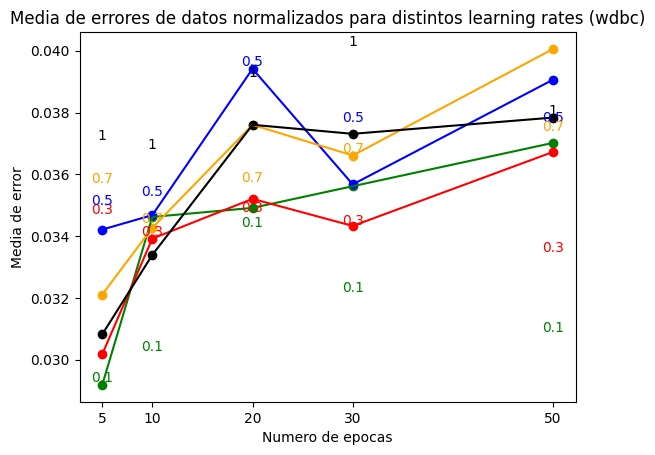

In [35]:
# Plot
col = ["green", "red", "blue", "orange", "black"]

for i in range(len(epocs)):
    plt.scatter(epocs, erroresRL[i], color=col[i])
    plt.plot(epocs, erroresRL[i], color=col[i])

    for j, lr in enumerate(lr_s):
        font = {
                'color':  col[j],
                'size': 10
                }
        plt.text(epocs[i], erroresRL[i][j], lr, va='bottom', ha='center', fontdict=font)

plt.xlabel("Numero de epocas")
plt.ylabel("Media de error")

plt.xticks(epocs)
plt.title("Media de errores de datos normalizados para distintos learning rates (wdbc)")

plt.show()

In [36]:
# Predictions prima_indian_diabetes

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    erroresRL = get_errors_RL(X_prima, y_prima)

epocs: 5 lr: 0.1 errors: (0.2572727272727273, 0.031421862544652006)
epocs: 5 lr: 0.3 errors: (0.2824675324675324, 0.038522666083458196)
epocs: 5 lr: 0.5 errors: (0.29069264069264067, 0.04311381880312141)
epocs: 5 lr: 0.7 errors: (0.2923376623376624, 0.0458034639481079)
epocs: 5 lr: 1 errors: (0.30168831168831167, 0.050416436381417046)
epocs: 10 lr: 0.1 errors: (0.257965367965368, 0.028228925723831542)
epocs: 10 lr: 0.3 errors: (0.2807359307359308, 0.04079555467401316)
epocs: 10 lr: 0.5 errors: (0.293982683982684, 0.04853157535010744)
epocs: 10 lr: 0.7 errors: (0.29770562770562764, 0.04020083667480097)
epocs: 10 lr: 1 errors: (0.2954978354978355, 0.05019263504546365)
epocs: 20 lr: 0.1 errors: (0.26432900432900436, 0.02878589323621676)
epocs: 20 lr: 0.3 errors: (0.2807359307359307, 0.03905412161135883)
epocs: 20 lr: 0.5 errors: (0.2909090909090909, 0.04574018681167893)
epocs: 20 lr: 0.7 errors: (0.2922510822510822, 0.04480255968159185)
epocs: 20 lr: 1 errors: (0.2985281385281386, 0.04944

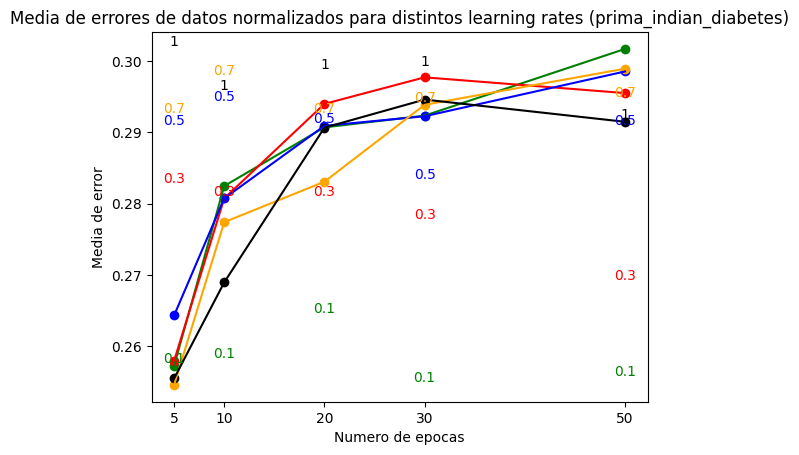

In [37]:
# Plot
col = ["green", "red", "blue", "orange", "black"]

for i in range(len(epocs)):
    plt.scatter(epocs, erroresRL[i], color=col[i])
    plt.plot(epocs, erroresRL[i], color=col[i])

    for j, lr in enumerate(lr_s):
        font = {
                'color':  col[j],
                'size': 10
                }
        plt.text(epocs[i], erroresRL[i][j], lr, va='bottom', ha='center', fontdict=font)

plt.xlabel("Numero de epocas")
plt.ylabel("Media de error")

plt.xticks(epocs)
plt.title("Media de errores de datos normalizados para distintos learning rates (prima_indian_diabetes)")

plt.show()

## Analisis de Resultados y Comparacion de Resultadoss

Los resultados observados para ambos datasets, tienen de nuevo una tendencia ascendente de errores encontrados segun aumenta el numero de épocas, como ocurria con la implementacion propia.

En cuanto a los learning rates, por cada tramo (numero de épocas), si que varia de manera un poco impredecible. Ya que vemos que el numero de fallos a veces es mejor con learning rates mas bajos, y otros con valores más altos.

# Apartado 3

In [39]:
from ClasificadorKNN import ClasificadorKNN
from ClasificadorNB import ClasificadorNaiveBayes


RL_classifier = ClasificadorRegresionLogistica(normalizar=True, learning_rate=1, n_epocs=50)
KNN_classifier = ClasificadorKNN(K=3)
NB_classifier = ClasificadorNaiveBayes(laplace=True)

## Espacios ROC - Dataset WDBC

In [22]:
errors_RL, matrix_RL = RL_classifier.validacion(estrategia, dataset_wdbc)
errors_KNN, matrix_KNN = KNN_classifier.validacion(estrategia, dataset_wdbc)
errors_NB, matrix_NB = NB_classifier.validacion(estrategia, dataset_wdbc)

print("RL - ", errors_RL, matrix_RL)
print("KNN - ", errors_KNN, matrix_KNN)
print("NB - ", errors_NB, matrix_NB)

RL -  (0.04771929824561404, 0.028236834687075697) {'TPR': 0.8970588235294118, 'FNR': 0.10294117647058823, 'FPR': 0.0, 'TNR': 1.0}
KNN -  (0.07380116959064327, 0.018562623174128216) {'TPR': 0.8970588235294118, 'FNR': 0.10294117647058823, 'FPR': 0.038834951456310676, 'TNR': 0.9611650485436893}
NB -  (0.37684210526315787, 0.0326577689446077) {'TPR': 0.0, 'FNR': 1.0, 'FPR': 0.0, 'TNR': 1.0}


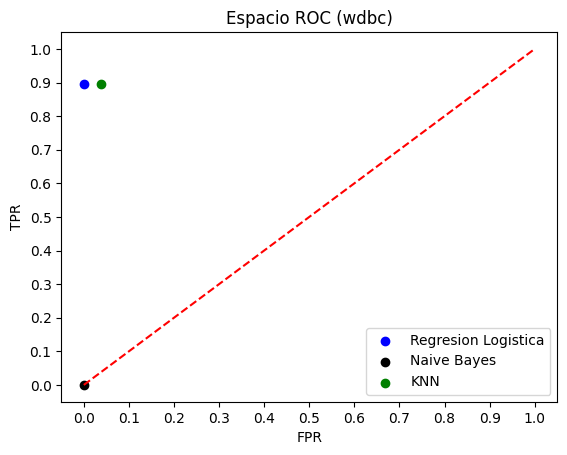

In [23]:
# Plot
X = np.arange(0, 1.1, 0.1)
Y = np.arange(0, 1.1, 0.1)

plt.plot(X, Y, color="red", linestyle="--")

plt.scatter(matrix_RL["FPR"], matrix_RL["TPR"], color="blue", label="Regresion Logistica")
plt.scatter(matrix_NB["FPR"], matrix_NB["TPR"], color="black", label="Naive Bayes")
plt.scatter(matrix_KNN["FPR"], matrix_KNN["TPR"], color="green", label="KNN")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.yticks(Y)
plt.xticks(X)

plt.legend()
plt.title("Espacio ROC (wdbc)")

plt.show()

### Explicacion de Espacio ROC

El espacio ROC resulta útil para obtener las relaciones entre los verdaderos positivos (deteccion acertada de la clase positiva), y los falsos positivos (deteccion fallida de la clase positiva), representandose los primeros en el eje vertical, y los segundos sobre la horizontal.

## Analisis de resultados

Nuestros resultados para el dataset WDBC, muestran que tanto KNN como Regresion Logisitica, se encuentran en el punto aproximadamente (0, 0.9). Esto es muy buen resultado, ya que significa que hemos obtenido un 90% de acierto en las predicciones de la clase positiva.

Sin embargo en Naive Bayes, hemos obtenido (0, 0), esto significa que no proporciona informacion para nuestro analisis ROC ya que ninguna fila predice sobre la clase positiva.

## Espacios ROC - Dataset Prima_indians_diabetes

In [40]:
errors_RL, matrix_RL = RL_classifier.validacion(estrategia, dataset_prima)
errors_KNN, matrix_KNN = KNN_classifier.validacion(estrategia, dataset_prima)
errors_NB, matrix_NB = NB_classifier.validacion(estrategia, dataset_prima)

print("RL - ", errors_RL, matrix_RL)
print("KNN - ", errors_KNN, matrix_KNN)
print("NB - ", errors_NB, matrix_NB)

RL -  (0.3034199134199135, 0.04343307539629321) {'TPR': 0.6341463414634146, 'FNR': 0.36585365853658536, 'FPR': 0.24161073825503357, 'TNR': 0.7583892617449665}
KNN -  (0.3074025974025974, 0.023966386073011683) {'TPR': 0.5609756097560976, 'FNR': 0.43902439024390244, 'FPR': 0.21476510067114093, 'TNR': 0.785234899328859}
NB -  (0.35259740259740263, 0.027626883498073396) {'TPR': 0.0, 'FNR': 1.0, 'FPR': 0.0, 'TNR': 1.0}


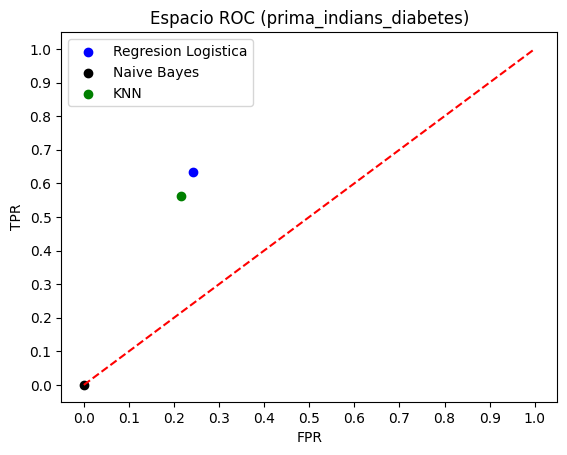

In [41]:
# Plot
X = np.arange(0, 1.1, 0.1)
Y = np.arange(0, 1.1, 0.1)

plt.plot(X, Y, color="red", linestyle="--")

plt.scatter(matrix_RL["FPR"], matrix_RL["TPR"], color="blue", label="Regresion Logistica")
plt.scatter(matrix_NB["FPR"], matrix_NB["TPR"], color="black", label="Naive Bayes")
plt.scatter(matrix_KNN["FPR"], matrix_KNN["TPR"], color="green", label="KNN")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.yticks(Y)
plt.xticks(X)

plt.legend()
plt.title("Espacio ROC (prima_indians_diabetes)")

plt.show()

## Analisis de resultados

En el caso de prima-indian-diabetes, como se puede observar a simple vista, los resultados no son tan buenos como los de WDBC. A pesar de ello, siguen estando en el sector de buenos resultados que es el superior izquierdo.

Para Regresion logistica y KNN , el punto esta aproximadamente en el (0.2, 0.6), lo que significa que el acierto sobre la clase positiva es el 60% que sigue siendo más de la mitad, mientras que un 20% de los negativos son nombrados como positivos, lo cual es mas problematico.

# Apartado 4

### Algoritmo de generacion de puntos

Nuestro algoritmo, lo que recibe es una lista de tuplas con los valores (score, clase real), el numero de observaciones reales de la clase Positiva y de la clase Negativa.

Lo primero que hace es ordenar de manera descendente la lista por el valor del score.
A continuacion, itera estos scores, y si el valor de la clase real es positiva (normalizada es la clase con valor 1) => Aumenta el verdadero positivo (TP)

Si por el contrario, el valor real de la clase es negativo (Normalizada clase 0) => Aumenta el falso positivo (FP)

Finalmente se guarda cada punto (FN/casos negativos(N), TP/casos positivos(P))

In [70]:
# Funcion que genera los puntos del analisis roc, recibiendo la lista de scores de test,
# el numero de positivos y negativos, ademas de la probabilidad de ser clasificado de clase 1
def generate_ROC_points(scores, P, N):

    if len(scores) < 1 or P < 1 or N < 1:
        return []

    # predicciones ordenadas por la probabilidad en orden descendente
    scores = sorted(scores, reverse=True, key=getKey)

    FP, TP = 0, 0
    points = []

    for score in scores:

        if score[1] > 0.5:
            TP += 1
        else:
            FP += 1

        points.append((FP/N, TP/P, score[0]))

    return points

def getKey(item):
    return item[0]

## Curva ROC - Dataset WDBC

In [91]:
from collections import Counter

RL_classifier = ClasificadorRegresionLogistica(normalizar=True, learning_rate=1, n_epocs=50)
estrategia = EstrategiaParticionado.ValidacionSimple(numeroEjec=1, propTest=30)
RL_classifier.validacion(estrategia, dataset_wdbc)


RL_scores = RL_classifier.predicciones()
RL_actuals, C1, C2 = RL_classifier.actuales()


RL_complete = [(score, actual) for score, actual in zip(RL_scores, RL_actuals)]

P = 0
N = 0

d = Counter(RL_actuals).most_common(2)
if d[0][0] == C1:
    N = d[0][1]
    P = d[1][1]
else:
    N = d[1][1]
    P = d[0][1]

ROC_points = generate_ROC_points(RL_complete, P, N)

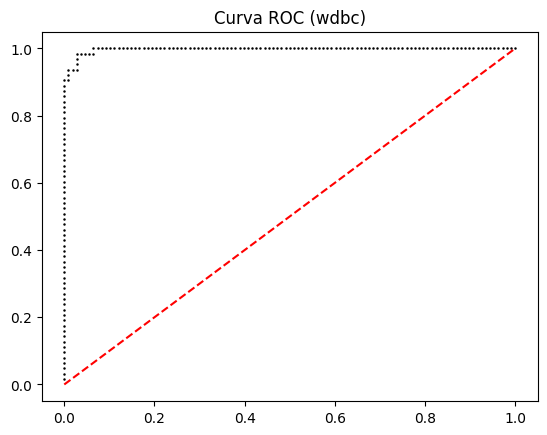

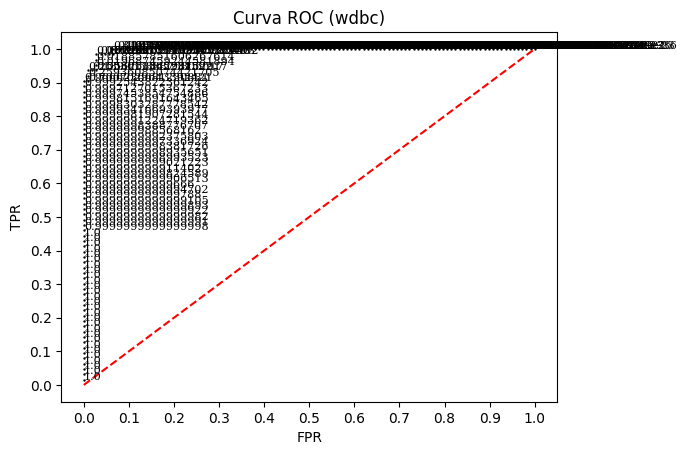

In [92]:
# Plot
X = np.arange(0, 1.1, 0.1)
Y = np.arange(0, 1.1, 0.1)

X_points = [p[0] for p in ROC_points]
Y_points = [p[1] for p in ROC_points]
labes = [p[2] for p in ROC_points]

plt.plot(X, Y, color="red", linestyle="--")
plt.scatter(X_points, Y_points, color="black", s=0.6)
plt.title("Curva ROC (wdbc)")

plt.show()

plt.plot(X, Y, color="red", linestyle="--")
plt.scatter(X_points, Y_points, color="black", s=0.5)

font = {'family': 'serif',
        'color':  'black',
        'size': 8
        }

for i, label in enumerate(labes):
    plt.text(X_points[i], Y_points[i], label, fontdict=font)

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.yticks(Y)
plt.xticks(X)

plt.title("Curva ROC (wdbc)")

plt.show()

#### Explicacion de Curva ROC

La curva ROC funciona de la siguiente menera:
Si la curva asciende de manera vertical => Implica que el punto es de clase positiva, y estos puntos se deberian de dar al principio, ya que estos se ordenan para empezar primero.

Si la curva aumenta de manera horizontal => Implica que el punto es de clase negativa y estos puntos deberian de estar al final, ya que tienen un score menor.

Es por eso que la tendencia es una curva, primero asciende vertical, y luego horizontalmente.

## Analisis de curva
Analizando la curva para WDBC:

Se puede apreciar que los resultados son bastante buenos, obviamente sin llegar al caso ideal (este seria de (0, 0) -> (0, 1) y luego de (0, 1) -> (1, 1)), pero se puede ver que asciende hasta el 0.9 de manera correcta, lo que indica que todos los casos positivos del principio son realmente positivos.
A continuacion, llega la zona de más errores, y estos es normal, porque en la zona de clasificacion intermedia (donde los scores son mas cercanos al 0.5 en el caso de regresion logisitica), son mas propenso a fallar o acertar la clase por poco.
Finalmente, es el caso contrario al positivo pero con los casos negativos, que estos predicen bien la clase negativa.

## Curva ROC - Dataset Prima_indians_diabetes

In [93]:
RL_classifier.validacion(estrategia, dataset_prima)


RL_scores = RL_classifier.predicciones()
RL_actuals, C1, C2 = RL_classifier.actuales()


RL_complete = [(score, actual) for score, actual in zip(RL_scores, RL_actuals)]

P = 0
N = 0

d = Counter(RL_actuals).most_common(2)
if d[0][0] == C1:
    N = d[0][1]
    P = d[1][1]
else:
    N = d[1][1]
    P = d[0][1]

ROC_points = generate_ROC_points(RL_complete, P, N)

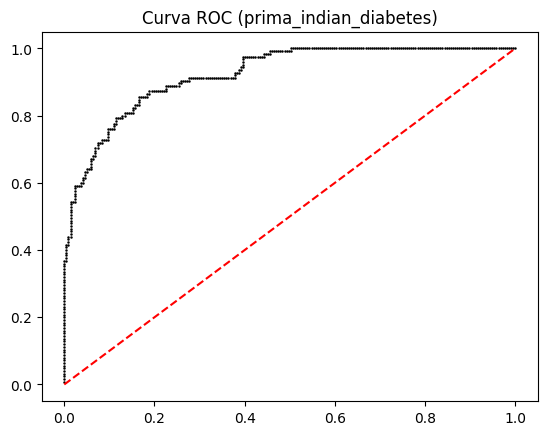

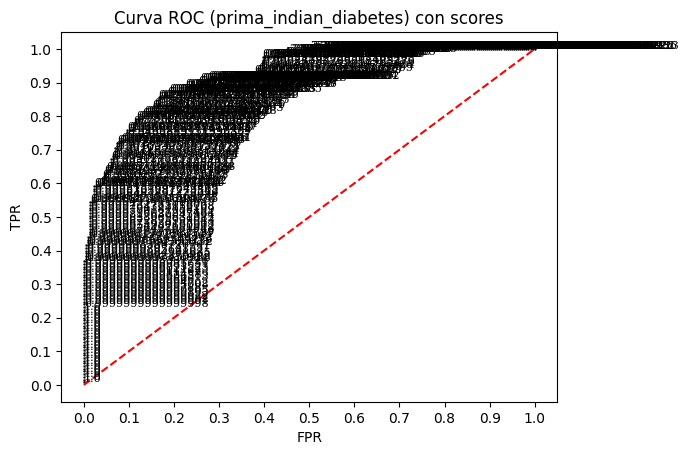

In [94]:
# Plot
X = np.arange(0, 1.1, 0.1)
Y = np.arange(0, 1.1, 0.1)

X_points = [p[0] for p in ROC_points]
Y_points = [p[1] for p in ROC_points]
labes = [p[2] for p in ROC_points]

plt.plot(X, Y, color="red", linestyle="--")
plt.scatter(X_points, Y_points, color="black", s=0.6)

plt.title("Curva ROC (prima_indian_diabetes)")

plt.show()

plt.plot(X, Y, color="red", linestyle="--")
plt.scatter(X_points, Y_points, color="black", s=0.5)

font = {'family': 'serif',
        'color':  'black',
        'size': 8
        }

for i, label in enumerate(labes):
    plt.text(X_points[i], Y_points[i], label, fontdict=font)

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.yticks(Y)
plt.xticks(X)

plt.title("Curva ROC (prima_indian_diabetes) con scores")

plt.show()

### Analisis de curva

En cuanto a la curva para prima indian dibetes:

Se aprecia que la curva es peor que WDBC, y en este caso, se ve que comete mas fallos ya que mientras que la de WDBC hasta el 0.9 no fallaba en la vertical, en este caso, en el 0.4 ya empieza a aumentar hacia la horizontal.
Esto se de a que la "zona intermedia" que comentaba antes (donde se encuentran los puntos con probabilidad cercana al 0.5) es mayor, y con lo cual se cometen mas fallos de clasificación.